# Import modules, libraries, and packages

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys

# Get the current working directory of the notebook
CURRENT_DIR = os.getcwd()
# Add the parent directory of the notebook to the Python path
ROOT_DIR = os.path.abspath(os.path.join(CURRENT_DIR, '..', '..', '..'))
sys.path.append(ROOT_DIR)

import xarray as xr
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import geopandas as gpd
from fiona.crs import from_epsg

from utils.utils import load_util_data, get_unusable_basins

# Parameters and constants

In [2]:
data_dir, data_gen = load_util_data(CURRENT_DIR)

In [3]:
# FILES_DIR = os.path.join(root_dir, 'gladwell/hydrology/SUMMA/summa-ml-models')

DATASET = 'CAMELS_spat_NH'

# COUNTRY = 'CAN'  # 'USA' or 'CAN'

INPUT_FILES_DIR = data_dir['data_dir_camels_spat_nh']
# ATTR_FILES_DIR = os.path.join(FILES_DIR, DATASET.upper(), 'camels_attributes_v2.0')
BASIN_SET_FILES_DIR = os.path.join(INPUT_FILES_DIR, 'merged_lumped_shapes')

# FORCINGS = ['daymet', 'nldas', 'maurer']
# FORCINGS_dict = {
#     'daymet': 'cida',
#     'nldas': 'nldas',
#     'maurer': 'maurer',
# }

# HRU_IDS = [
#     'CAN_01AD002',
#     'CAN_01AL003',
#     'CAN_01AF007',
#     'CAN_01AJ003',
#     'CAN_01AJ004',
#     'CAN_01AJ010',
#     'CAN_01AK001',
#     'CAN_01AK006',
#     'CAN_01AK007',
#     'CAN_01AL002'
# ]

## Load unusable basins

In [4]:
unusuable_basins = get_unusable_basins(INPUT_FILES_DIR, data_gen['camels_spat_unusable'])

## Loading basin IDs

In [5]:
##Read the basin shapefile
gdf_basins = gpd.read_file(os.path.join(BASIN_SET_FILES_DIR, 'merged_lumped_outlines.shp'))
# Subset the basins to only include the ones that are usable
gdf_basins = gdf_basins[~gdf_basins['Station_id'].isin(unusuable_basins)]

# # merged_lumped_outlines
# camels_new_delineation = gpd.read_file(os.path.join(BASIN_SET_FILES_DIR, 'camels_new_delineation.shp'))

gdf_borders = gpd.read_file(os.path.join(INPUT_FILES_DIR, 'NA_PoliticalDivision/boundaries_p_2021_v3.shp'))
states = gpd.read_file(os.path.join(BASIN_SET_FILES_DIR, 'USA_Canada_ShapefileMerge.shp'))

In [19]:
gdf_basins.value_counts('Country')

Country
CAN    764
USA    662
Name: count, dtype: int64

In [7]:
# Set the CRS for gdf_basins
gdf_basins.crs = from_epsg(4326)

# Set a common CRS for both GeoDataFrames
common_crs = 'ESRI:102008'
gdf_basins = gdf_basins.to_crs(common_crs)

gdf_borders = gdf_borders.to_crs(common_crs)
gdf_borders = gdf_borders.set_crs(common_crs, allow_override=True)

In [8]:
gdf_borders = gdf_borders.to_crs(common_crs)
gdf_borders = gdf_borders.set_crs(common_crs, allow_override=True)

# Catchments plots

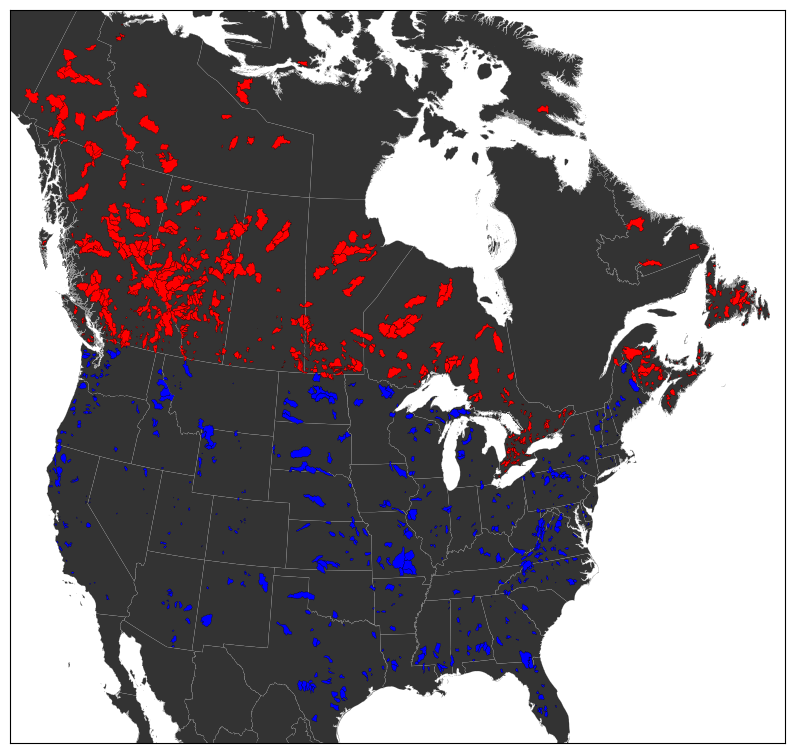

In [15]:
# Map color for country (CAN, USA)
cmap = {'CAN': 'r', 'USA': 'b'}

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the reprojected gdf_borders
# gdf_borders.boundary.plot(ax=ax, color=None, edgecolor='k', linewidth=0.1)
gdf_borders.plot(ax=ax, facecolor='0.2',edgecolor='0.7', linewidth=0.1)

# # Plot the merged_lumped_outlines
# gdf_basins.plot(ax=ax, color='lightblue', edgecolor='gray', linewidth=0.1)
# Plot the basins with different colors for each country
for country, color in cmap.items():
    gdf_basins[gdf_basins['Country'] == country].plot(ax=ax, color=color, edgecolor='k', linewidth=0.1)

# Chart junk
ax.set_xlim([-2.5*1e6, 3.1*1e6])
ax.set_ylim([-1.6*1e6, 3.7*1e6])

# ax.set_title("CAMELS_spat catchments")
# ax.set_xlabel('Longitude [degrees East]')
# ax.set_ylabel('Latitude [degrees North]')

# Remove x-axis ticks and labels
ax.set_xticks([])
ax.set_xticklabels([])
# Remove y-axis ticks and labels
ax.set_yticks([])
ax.set_yticklabels([])

# Show the plot
plt.show()